In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-euler-converge)

We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

In [2]:
using OrdinaryDiffEq
f(u, p, t) = sin((t + u)^2);
tspan = (0.0, 4.0);
u0 = -1.0;
ivp = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

Here is the call to {numref}`Function {number} <function-euler>`.

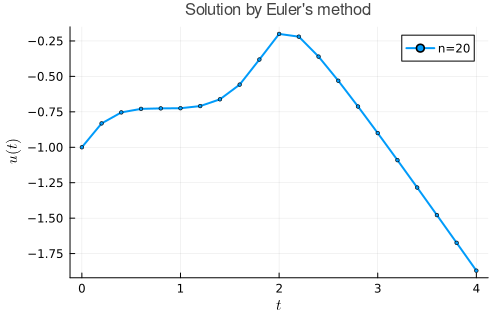

In [3]:
using Plots
t, u = FNC.euler(ivp, 20)
plot(t, u;
    m=2,  label="n=20", 
    xlabel=L"t",  ylabel=L"u(t)",
    title="Solution by Euler's method")

We could define a different interpolant to get a smoother picture above, but the derivation of Euler's method assumed a piecewise linear interpolant. We can instead request more steps to make the interpolant look smoother.

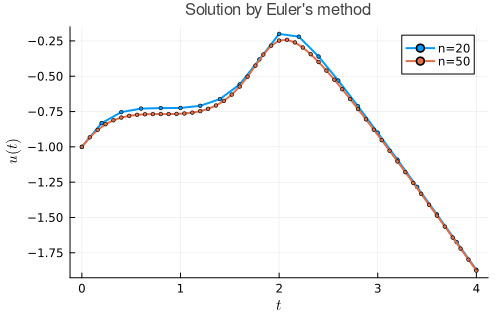

In [4]:
t, u = FNC.euler(ivp, 50)
plot!(t, u, m=2, label="n=50")

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should anticipate the same behavior from Euler's method. We don't have an exact solution to compare to, so we will use a `DifferentialEquations` solver to construct an accurate reference solution.

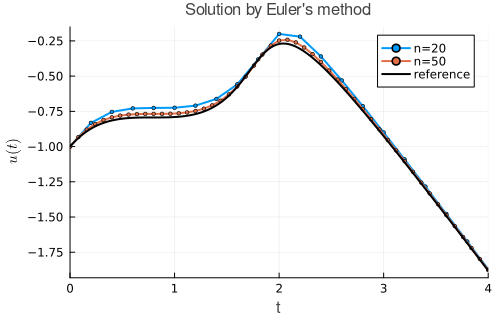

In [5]:
u_exact = solve(ivp, Tsit5(), reltol=1e-14, abstol=1e-14)
plot!(u_exact, l=(2, :black), label="reference")

Now we can perform a convergence study.

In [6]:
n = [round(Int, 5 * 10^k) for k in 0:0.5:3]
err = []
for n in n
    t, u = FNC.euler(ivp, n)
    push!(err, norm(u_exact.(t) - u, Inf))
end
@pt :header=["n", "inf-norm error"] [n err]

n,inf-norm error
5,2.7342
16,0.107594
50,0.0299962
158,0.00885025
500,0.00273659
1581,0.000859654
5000,0.000271243


The error is approximately cut by a factor of 10 for each increase in $n$ by the same factor. A log-log plot also confirms first-order convergence. Keep in mind that since $h=(b-a)/n$, it follows that $O(h)=O(n^{-1})$.

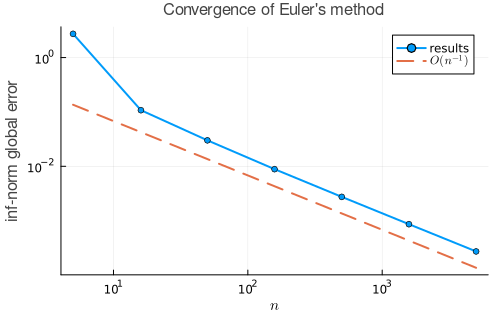

In [7]:
plot(n, err;
    m=:o, label="results",
    xaxis=(:log10, L"n"),  yaxis=(:log10, "inf-norm global error"),
    title="Convergence of Euler's method")

# Add line for perfect 1st order.
plot!(n, 0.5 * err[end] * (n / n[end]) .^ (-1), l=:dash, label=L"O(n^{-1})")